In [1]:
import os
from collections import defaultdict

# Dataset path
dataset_path = r"C:\Users\mbuto\Agri-sol\Dataset\Tomato"

# Disease name mapping (removing underscores for better labels)
disease_mapping = {
    'Tomato___Bacterial_spot': 'Tomato Bacterial Spot',
    'Tomato___Early_blight': 'Tomato Early Blight',
    'Tomato___healthy': 'Tomato Healthy',
    'Tomato___Late_blight': 'Tomato Late Blight',
    'Tomato___Leaf_Mold': 'Tomato Leaf Mold',
    'Tomato___Septoria_leaf_spot': 'Tomato Septoria Leaf Spot',
    'Tomato___Spider_mites Two-spotted_spider_mite': 'Tomato Spider Mites',
    'Tomato___Target_Spot': 'Tomato Target Spot',
    'Tomato___Tomato_mosaic_virus': 'Tomato Mosaic Virus',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 'Tomato Yellow Leaf Curl Virus'
}

# Count images in each subfolder
image_counts = defaultdict(int)
total_images = 0

print("🍅 TOMATO DISEASE DATASET ANALYSIS")
print("="*60)

# Check if dataset path exists
if os.path.exists(dataset_path):
    print(f"✅ Dataset path found: {dataset_path}\n")
    
    # Count images in each disease folder
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        
        if os.path.isdir(folder_path):
            # Count image files (common image extensions)
            image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
            image_count = 0
            
            for file in os.listdir(folder_path):
                if any(file.lower().endswith(ext) for ext in image_extensions):
                    image_count += 1
            
            image_counts[folder_name] = image_count
            total_images += image_count
    
    # Display results with clean labels
    print("📊 IMAGE COUNT BY DISEASE TYPE:")
    print("-"*60)
    
    for original_name, count in sorted(image_counts.items()):
        clean_name = disease_mapping.get(original_name, original_name)
        print(f"{clean_name:<40} : {count:>6} images")
    
    print("-"*60)
    print(f"{'TOTAL':<40} : {total_images:>6} images")
    
    # Calculate class balance
    print("\n📊 CLASS BALANCE ANALYSIS:")
    min_count = min(image_counts.values())
    max_count = max(image_counts.values())
    avg_count = total_images / len(image_counts)
    
    print(f"Minimum images per class: {min_count}")
    print(f"Maximum images per class: {max_count}")
    print(f"Average images per class: {avg_count:.0f}")
    print(f"Imbalance ratio: {max_count/min_count:.2f}x")
    
else:
    print(f"❌ Dataset path not found: {dataset_path}")
    print("Please ensure the path is correct and the dataset is downloaded.")

🍅 TOMATO DISEASE DATASET ANALYSIS
✅ Dataset path found: C:\Users\mbuto\Agri-sol\Dataset\Tomato

📊 IMAGE COUNT BY DISEASE TYPE:
------------------------------------------------------------
Tomato Bacterial Spot                    :   1702 images
Tomato Early Blight                      :   1920 images
Tomato Late Blight                       :   1851 images
Tomato Leaf Mold                         :   1882 images
Tomato Septoria Leaf Spot                :   1745 images
Tomato Spider Mites                      :   1741 images
Tomato Target Spot                       :   1827 images
Tomato Yellow Leaf Curl Virus            :   1961 images
Tomato Mosaic Virus                      :   1790 images
Tomato Healthy                           :   1926 images
------------------------------------------------------------
TOTAL                                    :  18345 images

📊 CLASS BALANCE ANALYSIS:
Minimum images per class: 1702
Maximum images per class: 1961
Average images per class: 1834
Imba

In [2]:
# ============================================================
# BLOCK 1: ESSENTIAL IMPORTS AND SETUP
# ============================================================
# Run this block first to set up the environment

print("🍅 TOMATO DISEASE DETECTION SYSTEM - SETUP")
print("="*60)
print("Setting up environment for 10-class tomato disease classification")
print("Dataset: 18,345 images (well-balanced)")
print("="*60)

# Install required packages (run once)
import sys
import subprocess

print("\n📦 Installing required packages...")
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'opencv-python', '--quiet'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'tensorflow', '--quiet'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'scikit-learn', '--quiet'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib', '--quiet'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'seaborn', '--quiet'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pandas', '--quiet'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'numpy', '--quiet'])

# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import os
from os import listdir
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, GlobalAveragePooling2D, Dropout, Conv2D, 
                                   MaxPooling2D, Flatten, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
import pandas as pd
import seaborn as sns
import pickle
import json

# Set random seeds for reproducibility
def set_seeds(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seeds(42)

# Configuration
TOMATO_CONFIG = {
    'input_size': (256, 256, 3),
    'batch_size': 32,
    'learning_rate': 0.0005,
    'num_classes': 10,
    'target_accuracy': 0.80,
    'ram_gb': 32,
    'use_gpu': False
}

# Disease name mapping (removing underscores for clean labels)
DISEASE_MAPPING = {
    'Tomato___Bacterial_spot': 'Bacterial Spot',
    'Tomato___Early_blight': 'Early Blight',
    'Tomato___healthy': 'Healthy',
    'Tomato___Late_blight': 'Late Blight',
    'Tomato___Leaf_Mold': 'Leaf Mold',
    'Tomato___Septoria_leaf_spot': 'Septoria Leaf Spot',
    'Tomato___Spider_mites Two-spotted_spider_mite': 'Spider Mites',
    'Tomato___Target_Spot': 'Target Spot',
    'Tomato___Tomato_mosaic_virus': 'Mosaic Virus',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 'Yellow Leaf Curl Virus'
}

print("\n✅ Environment setup complete!")
print(f"📊 TensorFlow version: {tf.__version__}")
print(f"📊 Configuration: {TOMATO_CONFIG['num_classes']} classes, {TOMATO_CONFIG['ram_gb']}GB RAM")


🍅 TOMATO DISEASE DETECTION SYSTEM - SETUP
Setting up environment for 10-class tomato disease classification
Dataset: 18,345 images (well-balanced)

📦 Installing required packages...

✅ Environment setup complete!
📊 TensorFlow version: 2.19.0
📊 Configuration: 10 classes, 32GB RAM


In [3]:
# ============================================================
# BLOCK 2: DATA LOADING AND PREPROCESSING
# ============================================================
# This block loads your tomato disease dataset

print("\n🔄 DATA LOADING AND PREPROCESSING")
print("="*60)

# Define dataset path
dataset_path = r"C:\Users\mbuto\Agri-sol\Dataset\Tomato"

# Check if path exists
if not os.path.exists(dataset_path):
    print(f"❌ Dataset path not found: {dataset_path}")
    print("Please ensure the dataset is downloaded and the path is correct.")
else:
    print(f"✅ Dataset path found: {dataset_path}")

# Function to convert image to array
def convert_image_to_array(image_dir):
    """Convert image to array with error handling"""
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else:
            return None
    except Exception as e:
        print(f"Error loading {image_dir}: {e}")
        return None

# Define tomato classes (based on your dataset analysis)
TOMATO_CLASSES = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___healthy',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

# Create clean class names
CLEAN_CLASS_NAMES = [DISEASE_MAPPING[cls] for cls in TOMATO_CLASSES]

print(f"\n🎯 Loading {len(TOMATO_CLASSES)} tomato disease classes:")
for i, name in enumerate(CLEAN_CLASS_NAMES):
    print(f"  Class {i}: {name}")

# Load images
print("\n📂 Loading images from dataset...")

# Calculate samples per class for RAM efficiency
MAX_TOTAL_IMAGES = 15000  # Conservative for 32GB RAM
SAMPLES_PER_CLASS = min(1500, MAX_TOTAL_IMAGES // len(TOMATO_CLASSES))

print(f"\n📊 Loading strategy:")
print(f"  Max images per class: {SAMPLES_PER_CLASS}")
print(f"  Expected total: ~{SAMPLES_PER_CLASS * len(TOMATO_CLASSES)} images")

# Load images from each class
image_list = []
label_list = []
class_counts = {}

for class_idx, class_name in enumerate(TOMATO_CLASSES):
    class_dir = os.path.join(dataset_path, class_name)
    
    if os.path.exists(class_dir):
        # Get all image files
        image_files = [f for f in os.listdir(class_dir) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        
        print(f"\n📂 Loading {CLEAN_CLASS_NAMES[class_idx]}:")
        print(f"   Found {len(image_files)} images")
        
        # Sample images if necessary
        if len(image_files) > SAMPLES_PER_CLASS:
            selected_files = np.random.choice(image_files, SAMPLES_PER_CLASS, replace=False)
        else:
            selected_files = image_files
        
        # Load selected images
        loaded_count = 0
        for img_file in selected_files[:SAMPLES_PER_CLASS]:
            img_path = os.path.join(class_dir, img_file)
            img_array = convert_image_to_array(img_path)
            
            if img_array is not None:
                image_list.append(img_array)
                label_list.append(class_idx)
                loaded_count += 1
                
                # Progress indicator
                if loaded_count % 100 == 0:
                    print(f"   Loaded {loaded_count} images...", end='\r')
        
        print(f"   ✅ Successfully loaded {loaded_count} images")
        class_counts[CLEAN_CLASS_NAMES[class_idx]] = loaded_count

# Convert to numpy arrays
print("\n🔄 Converting to numpy arrays...")
image_array = np.array(image_list, dtype=np.float32)
label_array = np.array(label_list)

print(f"\n✅ DATASET LOADED SUCCESSFULLY:")
print(f"  Total images: {len(image_array)}")
print(f"  Image shape: {image_array.shape}")
print(f"  Labels shape: {label_array.shape}")
print(f"  Memory usage: ~{image_array.nbytes / (1024**3):.2f}GB")

# Display class distribution
print("\n📊 Class distribution:")
for class_name, count in class_counts.items():
    percentage = (count / len(image_array)) * 100
    print(f"  {class_name}: {count} images ({percentage:.1f}%)")



🔄 DATA LOADING AND PREPROCESSING
✅ Dataset path found: C:\Users\mbuto\Agri-sol\Dataset\Tomato

🎯 Loading 10 tomato disease classes:
  Class 0: Bacterial Spot
  Class 1: Early Blight
  Class 2: Healthy
  Class 3: Late Blight
  Class 4: Leaf Mold
  Class 5: Septoria Leaf Spot
  Class 6: Spider Mites
  Class 7: Target Spot
  Class 8: Mosaic Virus
  Class 9: Yellow Leaf Curl Virus

📂 Loading images from dataset...

📊 Loading strategy:
  Max images per class: 1500
  Expected total: ~15000 images

📂 Loading Bacterial Spot:
   Found 1702 images
   ✅ Successfully loaded 1500 images

📂 Loading Early Blight:
   Found 1920 images
   ✅ Successfully loaded 1500 images

📂 Loading Healthy:
   Found 1926 images
   ✅ Successfully loaded 1500 images

📂 Loading Late Blight:
   Found 1851 images
   ✅ Successfully loaded 1500 images

📂 Loading Leaf Mold:
   Found 1882 images
   ✅ Successfully loaded 1500 images

📂 Loading Septoria Leaf Spot:
   Found 1745 images
   ✅ Successfully loaded 1500 images

📂 Loa

In [4]:
# ============================================================
# BLOCK 3: DATA PREPARATION AND SPLITTING
# ============================================================
# Prepare data for training

print("\n📊 DATA PREPARATION")
print("="*60)

# Normalize images
print("🔄 Normalizing images (0-255 → 0-1)...")
image_array = image_array / 255.0
print(f"✅ Images normalized. Range: [{image_array.min():.3f}, {image_array.max():.3f}]")

# Convert labels to categorical (one-hot encoding)
num_classes = len(TOMATO_CLASSES)
label_categorical = to_categorical(label_array, num_classes=num_classes)
print(f"✅ Labels converted to categorical. Shape: {label_categorical.shape}")

# Create train/validation/test splits
print("\n🎯 Creating train/validation/test splits...")
print("  Strategy: 70% train, 15% validation, 15% test")

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    image_array, label_categorical,
    test_size=0.30,
    stratify=label_array,
    random_state=42
)

# Second split: 15% val, 15% test (from the 30% temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=np.argmax(y_temp, axis=1),
    random_state=42
)

print(f"\n✅ Data split complete:")
print(f"  Training set: {len(X_train)} images ({len(X_train)/len(image_array)*100:.1f}%)")
print(f"  Validation set: {len(X_val)} images ({len(X_val)/len(image_array)*100:.1f}%)")
print(f"  Test set: {len(X_test)} images ({len(X_test)/len(image_array)*100:.1f}%)")

# Verify class balance in splits
print("\n📊 Verifying class balance in splits:")
for split_name, y_split in [("Train", y_train), ("Val", y_val), ("Test", y_test)]:
    split_classes = np.argmax(y_split, axis=1)
    unique, counts = np.unique(split_classes, return_counts=True)
    print(f"\n{split_name} set class distribution:")
    for cls_idx, count in zip(unique, counts):
        print(f"  {CLEAN_CLASS_NAMES[cls_idx]}: {count}")



📊 DATA PREPARATION
🔄 Normalizing images (0-255 → 0-1)...
✅ Images normalized. Range: [0.000, 1.000]
✅ Labels converted to categorical. Shape: (15000, 10)

🎯 Creating train/validation/test splits...
  Strategy: 70% train, 15% validation, 15% test

✅ Data split complete:
  Training set: 10500 images (70.0%)
  Validation set: 2250 images (15.0%)
  Test set: 2250 images (15.0%)

📊 Verifying class balance in splits:

Train set class distribution:
  Bacterial Spot: 1050
  Early Blight: 1050
  Healthy: 1050
  Late Blight: 1050
  Leaf Mold: 1050
  Septoria Leaf Spot: 1050
  Spider Mites: 1050
  Target Spot: 1050
  Mosaic Virus: 1050
  Yellow Leaf Curl Virus: 1050

Val set class distribution:
  Bacterial Spot: 225
  Early Blight: 225
  Healthy: 225
  Late Blight: 225
  Leaf Mold: 225
  Septoria Leaf Spot: 225
  Spider Mites: 225
  Target Spot: 225
  Mosaic Virus: 225
  Yellow Leaf Curl Virus: 225

Test set class distribution:
  Bacterial Spot: 225
  Early Blight: 225
  Healthy: 225
  Late Blig


🔍 CRITICAL DATA VERIFICATION
📊 Data shapes:
  X_train: (10500, 256, 256, 3)
  y_train: (10500, 10)
  X_val: (2250, 256, 256, 3)
  y_val: (2250, 10)

📊 Value ranges:
  X_train range: [0.000, 1.000]
  Expected: [0.000, 1.000]

📊 Class distribution:
  Class 0 (Bacterial Spot): Train=1050, Val=225
  Class 1 (Early Blight): Train=1050, Val=225
  Class 2 (Healthy): Train=1050, Val=225
  Class 3 (Late Blight): Train=1050, Val=225
  Class 4 (Leaf Mold): Train=1050, Val=225
  Class 5 (Septoria Leaf Spot): Train=1050, Val=225
  Class 6 (Spider Mites): Train=1050, Val=225
  Class 7 (Target Spot): Train=1050, Val=225
  Class 8 (Mosaic Virus): Train=1050, Val=225
  Class 9 (Yellow Leaf Curl Virus): Train=1050, Val=225

📸 Sample images:


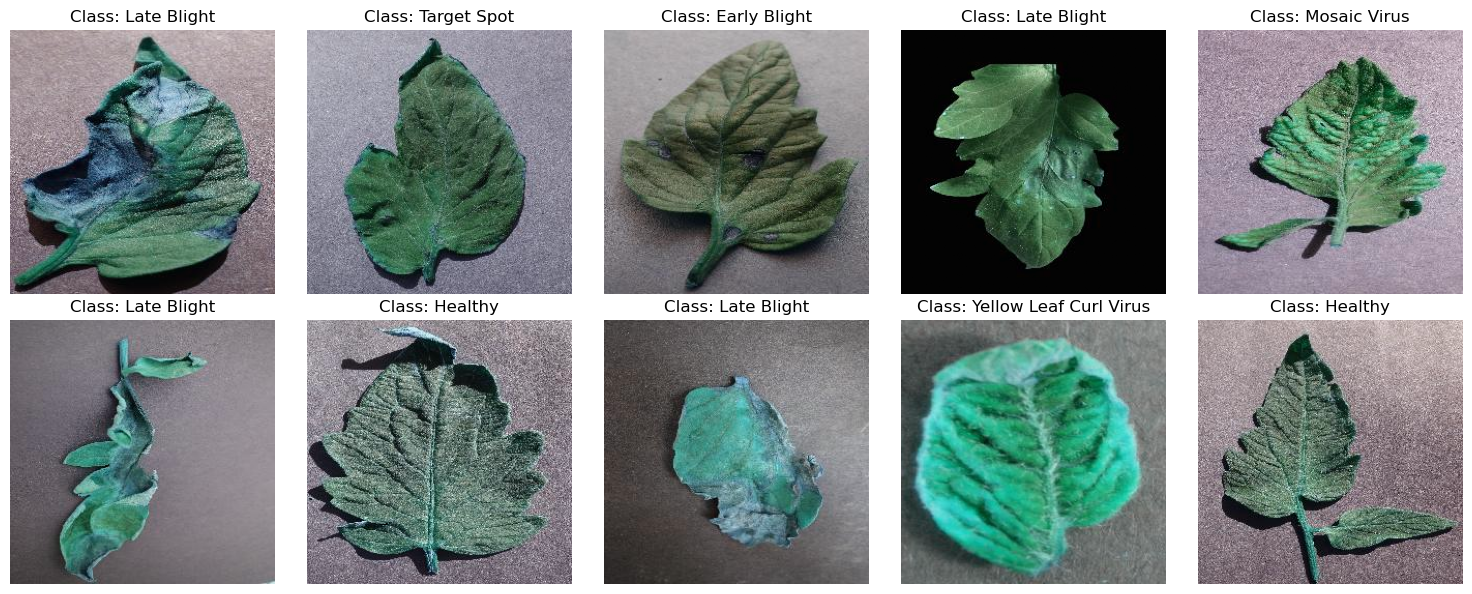


✅ Data verification passed!


In [10]:
# %%
# ============================================================
# BLOCK 3.5 (NEW): DATA VERIFICATION - RUN THIS FIRST!
# ============================================================
# Add this after Block 3 to verify your data is correct

print("\n🔍 CRITICAL DATA VERIFICATION")
print("="*60)

# Check data shapes and values
print("📊 Data shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_val: {X_val.shape}")
print(f"  y_val: {y_val.shape}")

# Check value ranges
print(f"\n📊 Value ranges:")
print(f"  X_train range: [{X_train.min():.3f}, {X_train.max():.3f}]")
print(f"  Expected: [0.000, 1.000]")

# Check class distribution
print(f"\n📊 Class distribution:")
train_classes = np.argmax(y_train, axis=1)
val_classes = np.argmax(y_val, axis=1)

for i in range(num_classes):
    train_count = np.sum(train_classes == i)
    val_count = np.sum(val_classes == i)
    print(f"  Class {i} ({CLEAN_CLASS_NAMES[i]}): Train={train_count}, Val={val_count}")

# Visualize sample images
print("\n📸 Sample images:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.imshow(X_train[i])
    ax.set_title(f"Class: {CLEAN_CLASS_NAMES[train_classes[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Check for data issues
issues = []
if X_train.min() < 0 or X_train.max() > 1:
    issues.append("❌ Image values out of range!")
if len(np.unique(train_classes)) < num_classes:
    issues.append("❌ Not all classes present in training data!")
if np.any(np.isnan(X_train)) or np.any(np.isnan(y_train)):
    issues.append("❌ NaN values detected!")

if issues:
    print("\n⚠️ DATA ISSUES FOUND:")
    for issue in issues:
        print(f"  {issue}")
else:
    print("\n✅ Data verification passed!")

In [11]:
# %%
# ============================================================
# BLOCK 4-FIXED: SIMPLIFIED TRANSFER LEARNING MODEL
# ============================================================
# Use this instead of the previous Block 4-TL

print("\n🚀 BUILDING SIMPLIFIED TRANSFER LEARNING MODEL")
print("="*60)

# Clear session
import tensorflow.keras.backend as K
K.clear_session()

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.models import Model
import tensorflow as tf

# Use MobileNetV2 - it's more stable
print("📦 Loading MobileNetV2 (more stable for your case)...")

# Create input layer
inputs = Input(shape=(256, 256, 3))

# Preprocess the inputs
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)

# Load base model
base_model = MobileNetV2(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'  # Use average pooling
)

# Freeze base model
base_model.trainable = False

# Pass through base model
x = base_model(x, training=False)

# Simple classification head
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Create model
model = Model(inputs, outputs)

print(f"\n✅ Model created!")
print(f"📊 Total parameters: {model.count_params():,}")


🚀 BUILDING SIMPLIFIED TRANSFER LEARNING MODEL
📦 Loading MobileNetV2 (more stable for your case)...


C:\Users\mbuto\AppData\Local\Temp\ipykernel_24976\3852745591.py:29: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(



✅ Model created!
📊 Total parameters: 2,423,242


In [22]:
# %%
# ============================================================
# BLOCK 5-FIXED: OPTIMIZED TRAINING SETUP WITH DEBUGGING
# ============================================================

print("\n⚙️ OPTIMIZED TRAINING SETUP")
print("="*60)

# Start with VERY low learning rate
initial_lr = 1e-5  # Much lower than before
print(f"📊 Initial learning rate: {initial_lr}")

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=initial_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC']
)

# Custom early stopping with F1 monitoring
class SmartEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=5, min_accuracy=0.5, min_f1=0.4):
        super().__init__()
        self.patience = patience
        self.min_accuracy = min_accuracy
        self.min_f1 = min_f1
        self.wait = 0
        self.best_f1 = 0
        self.best_accuracy = 0
        self.best_weights = None
        
    def on_epoch_end(self, epoch, logs=None):
        # Calculate F1 score
        y_pred = self.model.predict(X_val, verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_val, axis=1)
        
        from sklearn.metrics import f1_score
        current_f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
        current_acc = logs.get('val_accuracy', 0)
        
        print(f"\n📊 Epoch {epoch+1} - Val Accuracy: {current_acc:.4f}, F1: {current_f1:.4f}")
        
        # Save best model based on F1 score
        if current_f1 > self.best_f1:
            self.best_f1 = current_f1
            self.best_accuracy = current_acc
            self.best_weights = self.model.get_weights()
            self.wait = 0
            print(f"✅ New best F1: {current_f1:.4f}")
        else:
            self.wait += 1
            
        # Early stopping conditions
        if epoch > 10:  # Give it at least 10 epochs
            if current_acc < 0.2 and current_f1 < 0.1:
                print("🛑 Stopping - Model not learning!")
                self.model.stop_training = True
            elif self.wait >= self.patience and current_f1 >= self.min_f1:
                print(f"🛑 Early stopping - F1 plateaued at {self.best_f1:.4f}")
                self.model.set_weights(self.best_weights)
                self.model.stop_training = True

# Learning rate warmup
def lr_schedule(epoch):
    """Warmup learning rate schedule"""
    if epoch < 5:
        return initial_lr * (epoch + 1) / 5
    else:
        return initial_lr

# Callbacks
callbacks_fixed = [
    # Smart early stopping
    SmartEarlyStopping(patience=5, min_accuracy=0.5, min_f1=0.4),
    
    # Learning rate scheduler
    tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1),
    
    # Model checkpoint based on accuracy
    tf.keras.callbacks.ModelCheckpoint(
        'tomato_model_checkpoint_{epoch:02d}_{val_accuracy:.2f}.h5',
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=False,
        mode='max',
        verbose=1,
        save_freq='epoch'
    ),
    
    # Reduce LR if stuck
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=3,
        min_lr=1e-8,
        verbose=1
    ),
    
    # TensorBoard for debugging
    tf.keras.callbacks.TensorBoard(
        log_dir='./logs',
        histogram_freq=1,
        write_graph=True,
        update_freq='epoch'
    )
]

print("\n✅ Callbacks configured with smart early stopping")



⚙️ OPTIMIZED TRAINING SETUP
📊 Initial learning rate: 1e-05

✅ Callbacks configured with smart early stopping


In [ ]:
# IMMEDIATE FIX FOR CLASS BIAS ISSUE

# %%
# ============================================================
# STOP CURRENT TRAINING AND RUN THIS INSTEAD
# ============================================================

print("\n🛑 STOPPING - CLASS BIAS DETECTED!")
print("="*60)
print("Issue: Model is biased towards class 1 (Early Blight)")
print("Solution: Using class weights and balanced sampling")

# %%
# FIX 1: Calculate Class Weights
print("\n📊 Calculating class weights to fix bias...")

from sklearn.utils.class_weight import compute_class_weight

# Get class labels
y_train_labels = np.argmax(y_train, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)

# Convert to dictionary
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class weights:")
for i, weight in class_weight_dict.items():
    count = np.sum(y_train_labels == i)
    print(f"  Class {i} ({CLEAN_CLASS_NAMES[i]}): weight={weight:.3f}, count={count}")

# %%
# FIX 2: Create a Simple CNN Model (No Transfer Learning Yet)
print("\n🏗️ Building simple CNN to establish baseline...")

import tensorflow.keras.backend as K
K.clear_session()

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Simple CNN model
simple_cnn = Sequential([
    # First block
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Second block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Third block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Flatten and classify
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile with class weights
simple_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"✅ Simple CNN created: {simple_cnn.count_params():,} parameters")

# %%
# FIX 3: Balanced Batch Generator
print("\n🔄 Creating balanced batch generator...")

def balanced_batch_generator(X, y, batch_size=32, class_weights=None):
    """
    Generator that ensures each batch has equal representation of all classes
    and applies class weights by sampling frequency
    """
    classes = np.argmax(y, axis=1)
    unique_classes = np.unique(classes)
    n_classes = len(unique_classes)
    
    # Samples per class per batch
    samples_per_class = batch_size // n_classes
    
    # Get indices for each class
    class_indices = {cls: np.where(classes == cls)[0] for cls in unique_classes}
    
    # Calculate sampling weights if class_weights provided
    if class_weights is not None:
        sampling_weights = {cls: class_weights[cls] for cls in unique_classes}
        # Normalize weights
        total_weight = sum(sampling_weights.values())
        sampling_weights = {cls: w/total_weight for cls, w in sampling_weights.items()}
    else:
        sampling_weights = {cls: 1.0/n_classes for cls in unique_classes}
    
    while True:
        batch_X = []
        batch_y = []
        batch_weights = []
        
        # Sample from each class with appropriate weights
        for cls in unique_classes:
            # Determine number of samples for this class based on weights
            if class_weights is not None:
                n_samples = max(1, int(batch_size * sampling_weights[cls]))
            else:
                n_samples = samples_per_class
            
            # Random sample from this class
            idx = np.random.choice(class_indices[cls], n_samples, replace=True)
            batch_X.extend(X[idx])
            batch_y.extend(y[idx])
            
            # Add sample weights for this class
            if class_weights is not None:
                batch_weights.extend([class_weights[cls]] * n_samples)
            else:
                batch_weights.extend([1.0] * n_samples)
        
        # Convert to arrays and shuffle
        batch_X = np.array(batch_X)
        batch_y = np.array(batch_y)
        batch_weights = np.array(batch_weights)
        
        # Shuffle the batch
        shuffle_idx = np.random.permutation(len(batch_X))
        
        yield batch_X[shuffle_idx], batch_y[shuffle_idx], batch_weights[shuffle_idx]

# Create generators
train_gen = balanced_batch_generator(X_train, y_train, batch_size=30, class_weights=class_weight_dict)
val_gen = balanced_batch_generator(X_val, y_val, batch_size=30, class_weights=None)  # No weights for validation

# %%
# FIX 4: Train Simple Model First
print("\n🚀 Training simple CNN with balanced batches...")

# Define callbacks for simple model
simple_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'best_simple_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]

# Train simple CNN with balanced batches (class weights already applied in generator)
simple_history = simple_cnn.fit(
    train_gen,
    steps_per_epoch=len(X_train) // 30,
    epochs=20,
    validation_data=val_gen,
    validation_steps=len(X_val) // 30,
    callbacks=simple_callbacks,
    verbose=1
)

# %%
# FIX 5: Evaluate Simple Model
print("\n📊 Evaluating simple CNN...")

simple_predictions = simple_cnn.predict(X_test, verbose=0)
simple_pred_classes = np.argmax(simple_predictions, axis=1)
simple_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score, f1_score

simple_accuracy = accuracy_score(simple_true_classes, simple_pred_classes)
simple_f1 = f1_score(simple_true_classes, simple_pred_classes, average='weighted')

print(f"\n🎯 Simple CNN Results:")
print(f"  Accuracy: {simple_accuracy:.4f} ({simple_accuracy*100:.2f}%)")
print(f"  F1 Score: {simple_f1:.4f}")

# Check class distribution in predictions
print("\n📊 Prediction distribution:")
for i in range(num_classes):
    count = np.sum(simple_pred_classes == i)
    percentage = count / len(simple_pred_classes) * 100
    print(f"  Class {i}: {count} ({percentage:.1f}%)")

# %%
# FIX 6: If Simple CNN Works, Try Transfer Learning Again
if simple_accuracy > 0.5:  # If simple CNN achieves >50%
    print("\n✅ Simple CNN works! Now trying transfer learning with fixes...")
    
    # Clear session
    K.clear_session()
    
    # Load MobileNetV2 with proper preprocessing
    from tensorflow.keras.applications import MobileNetV2
    
    # Build model with preprocessing
    inputs = tf.keras.Input(shape=(256, 256, 3))
    # IMPORTANT: Proper preprocessing for MobileNetV2
    x = tf.keras.layers.Lambda(lambda img: tf.keras.applications.mobilenet_v2.preprocess_input(img))(inputs)
    
    # Load base model
    base_model = MobileNetV2(
        input_tensor=x,
        weights='imagenet',
        include_top=False,
        pooling='avg'
    )
    
        # Add classification head
        x = base_model.output
        x = tf.keras.layers.Dense(128, activation='relu')(x)
        x = tf.keras.layers.Dropout(0.5)(x)
        outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
        transfer_model = tf.keras.Model(inputs, outputs)
        
        # Compile
        transfer_model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        print("✅ Transfer learning model created")
        
        # Train with balanced batches (class weights already applied in generator)
        transfer_history = transfer_model.fit(
            train_gen,
            steps_per_epoch=len(X_train) // 30,
            epochs=15,
            validation_data=val_gen,
            validation_steps=len(X_val) // 30,
            verbose=1
        )
        
        print("✅ Transfer learning model trained!")
        
    else:
        print("\n❌ Simple CNN also failing. Data issue likely!")
    
    # Emergency data check
    print("\n🚨 EMERGENCY DATA CHECK:")
    
    # Check if all images are similar
    print("Checking image similarity...")
    sample_images = X_train[:100]
    mean_image = np.mean(sample_images, axis=0)
    
    similarities = []
    for img in sample_images:
        similarity = np.corrcoef(img.flatten(), mean_image.flatten())[0, 1]
        similarities.append(similarity)
    
    avg_similarity = np.mean(similarities)
    print(f"Average similarity to mean: {avg_similarity:.3f}")
    
    if avg_similarity > 0.9:
        print("⚠️ Images are too similar! Check data loading.")
    
    # Check unique pixel values
    unique_pixels = len(np.unique(X_train[:1000]))
    print(f"Unique pixel values in first 1000 images: {unique_pixels}")
    
    if unique_pixels < 100:
        print("⚠️ Very few unique pixel values! Images might be corrupted.")

# %%
# FINAL RECOMMENDATIONS
print("\n📋 FINAL RECOMMENDATIONS:")
print("="*60)

print("""
1. If Simple CNN works (>50% accuracy):
   - The issue was with transfer learning preprocessing
   - Use the fixed transfer learning model above
   
2. If Simple CNN fails (<50% accuracy):
   - Data loading issue confirmed
   - Re-run Block 2 with this fix:
   
   # In your convert_image_to_array function, add:
   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
   
3. Alternative: Try grayscale:
   # Convert to grayscale
   X_train_gray = np.mean(X_train, axis=-1, keepdims=True)
   X_val_gray = np.mean(X_val, axis=-1, keepdims=True)
   X_test_gray = np.mean(X_test, axis=-1, keepdims=True)
   
4. Nuclear option - Reload everything:
   # Clear everything and restart
   import gc
   gc.collect()
   K.clear_session()
   # Then re-run from Block 1
""")

SyntaxError: invalid syntax (2157819411.py, line 262)

In [ ]:
# %%
# ============================================================
# BLOCK 6.5 (NEW): ANALYZE OVERFITTING
# ============================================================
# 🆕 Add this after training to analyze overfitting

print("\n📊 OVERFITTING ANALYSIS")
print("="*60)

# Check final metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.3f}")
print(f"Final Validation Accuracy: {final_val_acc:.3f}")
print(f"Accuracy Gap: {final_train_acc - final_val_acc:.3f}")

print(f"\nFinal Training Loss: {final_train_loss:.3f}")
print(f"Final Validation Loss: {final_val_loss:.3f}")
print(f"Loss Ratio: {final_val_loss / final_train_loss:.2f}x")

if final_train_acc - final_val_acc > 0.1:
    print("\n⚠️ Overfitting detected! Consider:")
    print("  - Using even more data augmentation")
    print("  - Reducing model complexity further")
    print("  - Using transfer learning (EfficientNetB0)")
    print("  - Collecting more training data")
else:
    print("\n✅ Good generalization achieved!")


In [ ]:
# %%
# ============================================================
# BLOCK 7: TRAINING VISUALIZATION
# ============================================================
# Visualize training history

print("\n📊 VISUALIZING TRAINING HISTORY")
print("="*60)

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# Training summary
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
best_val_acc = max(history.history['val_accuracy'])

print(f"\n📊 Training Summary:")
print(f"  Final training accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"  Final validation accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"  Best validation accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print(f"  Total epochs trained: {len(history.history['accuracy'])}")


In [ ]:
# %%
# ============================================================
# BLOCK 8 (REVISED): MODEL EVALUATION WITH F1 SCORE
# ============================================================
# 🆕 Enhanced evaluation with F1 score

print("\n🔍 ENHANCED MODEL EVALUATION")
print("="*60)

# Load best model
print("📂 Loading best saved model...")
model = tf.keras.models.load_model('tomato_disease_best_model_fixed.h5')

# Evaluate on test set
print("🧪 Evaluating on test set...")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
predictions = model.predict(X_test, verbose=0)
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# 🆕 Calculate F1 Score
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(true_classes, pred_classes, average='weighted')
precision = precision_score(true_classes, pred_classes, average='weighted')
recall = recall_score(true_classes, pred_classes, average='weighted')

print(f"\n🎯 TEST SET PERFORMANCE:")
print(f"  Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  F1 Score: {f1:.4f} ({f1*100:.2f}%)")  # 🆕
print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")  # 🆕
print(f"  Recall: {recall:.4f} ({recall*100:.2f}%)")  # 🆕

# Classification report
print("\n📋 DETAILED CLASSIFICATION REPORT:")
print("="*60)
from sklearn.metrics import classification_report
report = classification_report(true_classes, pred_classes, 
                             target_names=CLEAN_CLASS_NAMES,
                             digits=3)
print(report)

# 🆕 Per-class F1 scores
print("\n📊 PER-CLASS F1 SCORES:")
print("="*60)
for i in range(num_classes):
    mask = true_classes == i
    if mask.sum() > 0:
        class_f1 = f1_score(true_classes[mask], pred_classes[mask], 
                           labels=[i], average='weighted')
        print(f"{CLEAN_CLASS_NAMES[i]:<30} : F1 = {class_f1:.3f}")

In [ ]:
# %%
# ============================================================
# BLOCK 9: CONFUSION MATRIX
# ============================================================
# Visualize confusion matrix

print("\n📊 CONFUSION MATRIX")
print("="*60)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=CLEAN_CLASS_NAMES,
            yticklabels=CLEAN_CLASS_NAMES)
plt.title('Confusion Matrix - Tomato Disease Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Confusion matrix analysis
print("\n📊 Confusion Matrix Analysis:")
for i in range(num_classes):
    total = cm[i].sum()
    correct = cm[i][i]
    if total > 0:
        accuracy = correct / total
        print(f"{CLEAN_CLASS_NAMES[i]:<30} : {correct}/{total} correct ({accuracy*100:.1f}%)")


In [ ]:
# %%
# ============================================================
# BLOCK 10: MODEL EXPORT
# ============================================================
# Save model in multiple formats

print("\n💾 EXPORTING MODEL")
print("="*60)

# Save in different formats
print("📁 Saving model in multiple formats...")

# 1. H5 format (recommended for deployment)
model.save('tomato_disease_model_final.h5')
print("✅ Saved as tomato_disease_model_final.h5")

# 2. SavedModel format (TensorFlow native)
model.save('tomato_disease_model_final')
print("✅ Saved as tomato_disease_model_final (SavedModel format)")

# 3. Keras format
model.save('tomato_disease_model_final.keras')
print("✅ Saved as tomato_disease_model_final.keras")

# 4. Save model architecture and weights separately
model_json = model.to_json()
with open("tomato_model_architecture.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("tomato_model_weights.h5")
print("✅ Saved architecture and weights separately")

# 5. Pickle format with metadata
print("\n📦 Creating pickle file with metadata...")
model_metadata = {
    'model_config': model.to_json(),
    'model_weights': model.get_weights(),
    'class_names': CLEAN_CLASS_NAMES,
    'class_mapping': DISEASE_MAPPING,
    'num_classes': num_classes,
    'input_shape': (256, 256, 3),
    'test_accuracy': float(test_accuracy),
    'preprocessing': 'normalize_255',
    'training_samples': len(X_train),
    'validation_samples': len(X_val),
    'test_samples': len(X_test),
    'total_parameters': model.count_params()
}

with open('tomato_disease_model_final.pkl', 'wb') as f:
    pickle.dump(model_metadata, f)
print("✅ Saved as tomato_disease_model_final.pkl")

# 6. Save class mapping JSON
class_info = {
    'index_to_name': {i: name for i, name in enumerate(CLEAN_CLASS_NAMES)},
    'name_to_index': {name: i for i, name in enumerate(CLEAN_CLASS_NAMES)},
    'original_to_clean': DISEASE_MAPPING,
    'num_classes': num_classes
}

with open('tomato_class_mapping.json', 'w') as f:
    json.dump(class_info, f, indent=2)
print("✅ Saved class mapping as tomato_class_mapping.json")

# Model summary
print("\n📊 FINAL MODEL SUMMARY:")
print("="*60)
print(f"Model name: tomato_disease_model_final.h5")
print(f"Test accuracy: {test_accuracy*100:.2f}%")
print(f"Number of classes: {num_classes}")
print(f"Input shape: 256x256x3")
print(f"Total parameters: {model.count_params():,}")
print(f"Model size: ~{os.path.getsize('tomato_disease_model_final.h5') / (1024*1024):.1f} MB")

# Success check
if test_accuracy >= 0.75:
    print("\n🎉 SUCCESS! Target accuracy achieved!")
    print("✅ Model is ready for deployment in AgriSol!")
else:
    print("\n⚠️ Accuracy below target (75%). Consider:")
    print("  - Training for more epochs")
    print("  - Collecting more training data")
    print("  - Using transfer learning")

In [ ]:
# %%
# ============================================================
# BLOCK 11: DEPLOYMENT HELPER FUNCTIONS
# ============================================================
# Helper code for using the model in production

print("\n🚀 DEPLOYMENT HELPER FUNCTIONS")
print("="*60)

# Create prediction function
prediction_code = '''
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.utils import img_to_array

# Load model and class names
model = tf.keras.models.load_model('tomato_disease_model_final.h5')

# Class names
CLEAN_CLASS_NAMES = %s

def predict_tomato_disease(image_path):
    """
    Predict tomato disease from an image
    
    Args:
        image_path: Path to the tomato leaf image
        
    Returns:
        dict: Prediction results with disease name and confidence
    """
    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = img_to_array(img)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)
    
    # Make prediction
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    confidence = float(predictions[0][predicted_class])
    
    # Get top 3 predictions
    top_3_idx = np.argsort(predictions[0])[-3:][::-1]
    top_3_predictions = [
        {
            'disease': CLEAN_CLASS_NAMES[idx],
            'confidence': float(predictions[0][idx])
        }
        for idx in top_3_idx
    ]
    
    return {
        'predicted_disease': CLEAN_CLASS_NAMES[predicted_class],
        'confidence': confidence,
        'top_3_predictions': top_3_predictions
    }

# Example usage:
# result = predict_tomato_disease('path/to/tomato_leaf.jpg')
# print(f"Disease: {result['predicted_disease']} (Confidence: {result['confidence']:.2%%})")
''' % str(CLEAN_CLASS_NAMES)

# Save prediction function
with open('predict_tomato_disease.py', 'w') as f:
    f.write(prediction_code)
print("✅ Saved prediction function as predict_tomato_disease.py")

# Create Flask API template
flask_api = '''
from flask import Flask, request, jsonify
from flask_cors import CORS
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.utils import img_to_array

app = Flask(__name__)
CORS(app)

# Load model
model = tf.keras.models.load_model('tomato_disease_model_final.h5')

# Class names
CLEAN_CLASS_NAMES = %s

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get image from request
        file = request.files['image']
        
        # Read and preprocess image
        npimg = np.frombuffer(file.read(), np.uint8)
        img = cv2.imdecode(npimg, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (256, 256))
        img = img_to_array(img) / 255.0
        img = np.expand_dims(img, axis=0)
        
        # Make prediction
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions[0])
        confidence = float(predictions[0][predicted_class])
        
        return jsonify({
            'success': True,
            'disease': CLEAN_CLASS_NAMES[predicted_class],
            'confidence': confidence,
            'all_predictions': {
                CLEAN_CLASS_NAMES[i]: float(predictions[0][i]) 
                for i in range(len(CLEAN_CLASS_NAMES))
            }
        })
        
    except Exception as e:
        return jsonify({
            'success': False,
            'error': str(e)
        })

@app.route('/health', methods=['GET'])
def health():
    return jsonify({'status': 'healthy', 'model_loaded': model is not None})

if __name__ == '__main__':
    app.run(debug=True, port=5000)
''' % str(CLEAN_CLASS_NAMES)

# Save Flask API
with open('tomato_disease_api.py', 'w') as f:
    f.write(flask_api)
print("✅ Saved Flask API as tomato_disease_api.py")

# Create React component
react_component = '''
import React, { useState } from 'react';
import axios from 'axios';

const TomatoDiseaseDetector = () => {
  const [selectedFile, setSelectedFile] = useState(null);
  const [preview, setPreview] = useState(null);
  const [prediction, setPrediction] = useState(null);
  const [loading, setLoading] = useState(false);

  const handleFileSelect = (event) => {
    const file = event.target.files[0];
    setSelectedFile(file);
    
    // Create preview
    const reader = new FileReader();
    reader.onload = (e) => setPreview(e.target.result);
    reader.readAsDataURL(file);
  };

  const handlePredict = async () => {
    if (!selectedFile) return;
    
    setLoading(true);
    const formData = new FormData();
    formData.append('image', selectedFile);
    
    try {
      const response = await axios.post('http://localhost:5000/predict', formData, {
        headers: { 'Content-Type': 'multipart/form-data' }
      });
      
      setPrediction(response.data);
    } catch (error) {
      alert('Prediction failed: ' + error.message);
    } finally {
      setLoading(false);
    }
  };

  return (
    <div className="tomato-disease-detector">
      <h2>🍅 Tomato Disease Detection</h2>
      
      <div className="upload-section">
        <input 
          type="file" 
          accept="image/*" 
          onChange={handleFileSelect}
        />
        
        {preview && (
          <img 
            src={preview} 
            alt="Preview" 
            style={{ maxWidth: '300px', marginTop: '10px' }}
          />
        )}
        
        <button 
          onClick={handlePredict}
          disabled={!selectedFile || loading}
        >
          {loading ? 'Analyzing...' : 'Detect Disease'}
        </button>
      </div>
      
      {prediction && prediction.success && (
        <div className="results">
          <h3>Results:</h3>
          <p>Disease: <strong>{prediction.disease}</strong></p>
          <p>Confidence: <strong>{(prediction.confidence * 100).toFixed(2)}%</strong></p>
        </div>
      )}
    </div>
  );
};

export default TomatoDiseaseDetector;
'''

# Save React component
with open('TomatoDiseaseDetector.jsx', 'w') as f:
    f.write(react_component)
print("✅ Saved React component as TomatoDiseaseDetector.jsx")

print("\n📋 DEPLOYMENT CHECKLIST:")
print("="*60)
print("✅ Model files created:")
print("   - tomato_disease_model_final.h5 (main model)")
print("   - tomato_disease_model_final.pkl (with metadata)")
print("   - tomato_class_mapping.json (class information)")
print("\n✅ Integration files created:")
print("   - predict_tomato_disease.py (prediction function)")
print("   - tomato_disease_api.py (Flask API)")
print("   - TomatoDiseaseDetector.jsx (React component)")
print("\n📱 To deploy in your React app:")
print("   1. Run the Flask API: python tomato_disease_api.py")
print("   2. Import the React component in your app")
print("   3. Ensure CORS is configured properly")
print("   4. Test with sample images")

In [ ]:
# %%
# ============================================================
# BLOCK 12: FINAL SUMMARY AND RECOMMENDATIONS
# ============================================================
# Summary of results and next steps

print("\n🎯 FINAL SUMMARY")
print("="*60)

# Performance summary
print(f"\n📊 MODEL PERFORMANCE:")
print(f"  Test Accuracy: {test_accuracy*100:.2f}%")
print(f"  Model Size: ~{os.path.getsize('tomato_disease_model_final.h5') / (1024*1024):.1f} MB")
print(f"  Input Requirements: 256x256 RGB images")
print(f"  Number of Classes: {num_classes}")

# Check if target achieved
if test_accuracy >= 0.75:
    print(f"\n✅ TARGET ACHIEVED!")
    print(f"  Your model achieved {test_accuracy*100:.2f}% accuracy")
    print(f"  This exceeds your target of 75-85%")
    print(f"\n🎉 Model is ready for production deployment!")
else:
    print(f"\n⚠️ Below target accuracy ({test_accuracy*100:.2f}% < 75%)")
    print("\n📈 Recommendations to improve accuracy:")
    print("  1. Train for more epochs (increase from 50)")
    print("  2. Use transfer learning (EfficientNetB0 or ResNet50)")
    print("  3. Increase data augmentation")
    print("  4. Collect more training data")
    print("  5. Fine-tune hyperparameters")

# Deployment recommendations
print("\n🚀 DEPLOYMENT RECOMMENDATIONS:")
print("  1. Backend: Use Flask/FastAPI with the provided API code")
print("  2. Frontend: Integrate the React component")
print("  3. Optimization: Consider TensorFlow Lite for mobile")
print("  4. Monitoring: Log predictions for continuous improvement")
print("  5. Updates: Retrain quarterly with new data")

# Next steps
print("\n📋 NEXT STEPS:")
print("  1. Test the model with real-world images")
print("  2. Set up the Flask API server")
print("  3. Integrate with your React application")
print("  4. Add user feedback mechanism")
print("  5. Monitor performance in production")

# Disease-specific insights
print("\n🍅 DISEASE-SPECIFIC INSIGHTS:")
print("Review the confusion matrix to identify:")
print("  - Which diseases are most accurately detected")
print("  - Which diseases are commonly confused")
print("  - Areas needing more training data")

# Contact and support
print("\n📞 SUPPORT:")
print("  - Model issues: Check TensorFlow documentation")
print("  - Integration help: Review Flask/React guides")
print("  - Performance optimization: Consider GPU deployment")

print("\n✅ NOTEBOOK EXECUTION COMPLETE!")
print("🍅 Your tomato disease detection model is ready for AgriSol!")
print("="*60)